# Technical Analysis
## Import libraries and data

In [14]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
sp500 = web.DataReader('^GSPC', data_source='yahoo', start='1/1/2000', end='1/15/2016')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4035 entries, 2000-01-03 to 2016-01-15
Data columns (total 6 columns):
Open         4035 non-null float64
High         4035 non-null float64
Low          4035 non-null float64
Close        4035 non-null float64
Volume       4035 non-null int64
Adj Close    4035 non-null float64
dtypes: float64(5), int64(1)
memory usage: 220.7 KB


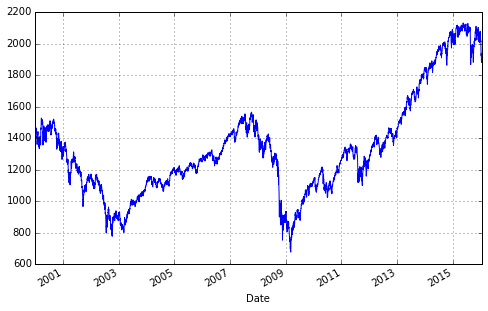

In [16]:
sp500['Close'].plot(grid=True, figsize=(8, 5))

In [17]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['Close'], window=42), 2)
sp500['252d'] = np.round(pd.rolling_mean(sp500['Close'], window=252), 2)

In [18]:
sp500[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-01-11,1923.670044,2048.02,2059.46
2016-01-12,1938.680054,2044.61,2059.10
2016-01-13,1890.280029,2040.21,2058.58
2016-01-14,1921.839966,2037.26,2058.22
2016-01-15,1880.329956,2033.86,2057.77


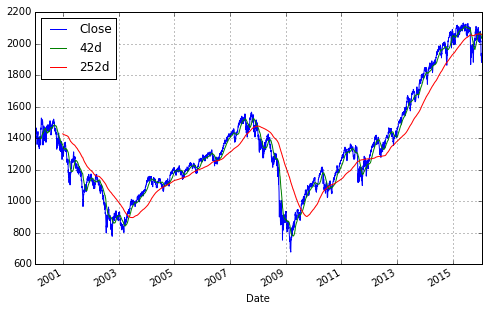

In [19]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [20]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

Date
2016-01-11   -11.44
2016-01-12   -14.49
2016-01-13   -18.37
2016-01-14   -20.96
2016-01-15   -23.91
Name: 42-252, dtype: float64

In [21]:
sp500['42-252'].head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42-252, dtype: float64

In [22]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1813
 0    1321
-1     901
Name: Regime, dtype: int64

(-1.1, 1.1)

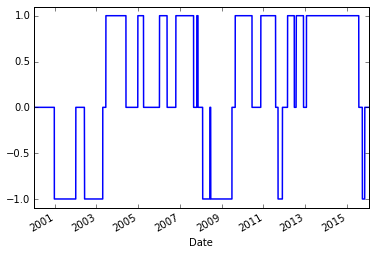

In [23]:
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

In [24]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

In [25]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

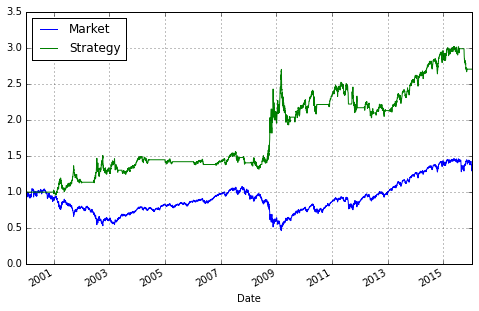

In [27]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8, 5))